#  Gaussian Mixture Model
To estimate the parameters of a Gaussian Mixture Model (GMM) using maximum likelihood over a given dataset $\{x_i; i = 1, \ldots, n\}$, you can follow these steps:

## **Model Definition**:

The GMM can be defined as:

$$
f(x) = \sum_{j=1}^{M} \alpha_j \mathcal{N}(x; \mu_j, \sigma_j)
$$

   where:
   - $\alpha_j$ are the mixing coefficients, which must satisfy $0 \leq \alpha_j \leq 1$ and $\sum_{j=1}^{M} \alpha_j = 1$.
   - $\mathcal{N}(x; \mu_j, \sigma_j)$ is the normal (Gaussian) distribution with mean $\mu_j$ and standard deviation $\sigma_j$.

## **Maximum Likelihood Estimation**:
   The likelihood of the data given the parameters is:

$$
L(\alpha, \mu, \sigma) = \prod_{i=1}^{n} f(x_i)
$$

   The log-likelihood is:
   
$$
\log L(\alpha, \mu, \sigma) = \sum_{i=1}^{n} \log \left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right)
$$

we maximize the expected log-likelihood with respect to the parameters $\alpha_j$, $\mu_j$, and $\sigma_j$.


### Solving for $\alpha_j$

Given that \(\sum_{j=1}^{M} \alpha_j = 1\) and \(\sum_{j=1}^{M} \sum_{i=1}^{n} \gamma_{ij} = n\), we get:

$$
n = M \lambda
$$

Thus:

$$
\lambda = \frac{n}{M}
$$

Substituting \(\lambda\) back into the equation for \(\alpha_j\):

$$
\alpha_j^{\text{new}} = \frac{1}{n} \sum_{i=1}^{n} \gamma_{ij}
$$

### Final Form

Therefore, the update for the mixing coefficients \(\alpha_j\) is given by:

$$
\alpha_j^{\text{new}} = \frac{1}{n} \sum_{i=1}^{n} \gamma_{ij}
$$

This completes the derivation of the mixing coefficients \(\alpha_j\) in the context of the EM algorithm for GMMs.

### Derivative with Respect to Mixing Coefficients $\alpha_j$

The expected log-likelihood with respect to $\alpha_j$ is:

$$
Q(\alpha)=\sum_{i=1}^{n} \log \left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right)-\lambda(\sum_{j=1}^{M} (\alpha_j - 1))
$$

To find the update for $\alpha_j$, we take the derivative and set it to zero. First, we focus on the term inside the log function:

$$
\frac{\partial}{\partial \alpha_j} \left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right) = \mathcal{N}(x_i; \mu_j, \sigma_j)
$$

Using the chain rule, the derivative of the log term with respect to \(\alpha_j\) is:

$$
\frac{\partial}{\partial \alpha_j} \left( \log \left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right) \right) = \frac{\mathcal{N}(x_i; \mu_j, \sigma_j)}{\sum_{k=1}^{M} \alpha_k \mathcal{N}(x_i; \mu_k, \sigma_k)}
$$

Define :

$$
\gamma_{ij} = \frac{\alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j)}{\sum_{k=1}^{M} \alpha_k \mathcal{N}(x_i; \mu_k, \sigma_k)}
$$


Summing over all data points \(i\):

$$
\sum_{i=1}^{n} \frac{\mathcal{N}(x_i; \mu_j, \sigma_j)}{\sum_{k=1}^{M} \alpha_k \mathcal{N}(x_i; \mu_k, \sigma_k)} = \sum_{i=1}^{n} \frac{\gamma_{ij}}{\alpha_j}
$$

Next, we consider the derivative of the constraint term:

$$
\frac{\partial}{\partial \alpha_j} \left( -\lambda \left( \sum_{j=1}^{M} \alpha_j - 1 \right) \right) = -\lambda
$$

Combining the derivatives from the log-likelihood term and the constraint term, we get:

$$
\frac{\partial Q(\alpha)}{\partial \alpha_j} = \sum_{i=1}^{n} \frac{\gamma_{ij}}{\alpha_j} - \lambda=0
$$

$$
\sum_{i=1}^{n} \gamma_{ij} = \alpha_j\lambda
$$

Summing over all \(j\):

$$
\sum_{j=1}^{M} \sum_{i=1}^{n} \gamma_{ij} = \sum_{j=1}^{M} \alpha_j\lambda
$$

$$
\sum_{j=1}^{M} \sum_{i=1}^{n} \gamma_{ij} = \lambda
$$

Substitute to $ \sum_{i=1}^{n} \gamma_{ij} = \alpha_j\lambda $

Thus, the update for $\alpha_j$ is:

$$
\alpha_j^{\text{new}} = \frac{\sum_{i=1}^{n} \gamma_{ij}}{\sum_{j=1}^{M}\sum_{i=1}^{n} \gamma_{ij}} 
$$

### Derivative with Respect to Means $\mu_j$

The expected log-likelihood with respect to $\mu_j$ is:

$$
\frac{\partial}{\partial \mu_j} \left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right) = \left(  -(\frac{x_i-\mu_j}{2\sigma_j^2})\alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right)
$$

Using it,

$$
\frac{\partial}{\partial \mu_j}\sum_{i=1}^{n} \log \left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right)=
$$

$$
\sum_{i=1}^{n}
\frac{\left(-(\frac{x_i-\mu_j}{2\sigma_j^2})\alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right)}{\left( \sum_{j=1}^{M} \alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j) \right)}=0
$$

$$
\frac{\partial Q(\mu)}{\partial \mu_j} = \sum_{i=1}^{n} \gamma_{ij} \left( \frac{(x_i - \mu_j)}{\sigma_j^2} \right) = 0
$$

Solving for $\mu_j$ gives:

$$
\mu_j^{\text{new}} = \frac{\sum_{i=1}^{n} \gamma_{ij} x_i}{\sum_{i=1}^{n} \gamma_{ij}}
$$

### Derivative with Respect to Standard Deviations $\sigma_j$

Taking the derivative with respect to $\sigma_j$:

$$
\frac{\partial Q(\sigma)}{\partial \sigma_j} = \sum_{i=1}^{n} \gamma_{ij} \left( -\frac{1}{\sigma_j} + \frac{(x_i - \mu_j)^2}{\sigma_j^3} \right) = 0
$$

Solving for $\sigma_j$ gives:

$$
\sigma_j^{\text{new}} = \sqrt{\frac{\sum_{i=1}^{n} \gamma_{ij} (x_i - \mu_j^{\text{new}})^2}{\sum_{i=1}^{n} \gamma_{ij}}}
$$

## **Expectation-Maximization (EM) Algorithm**:
   The EM algorithm is typically used to find the maximum likelihood estimates of the parameters.

   - **Initialization**:
     Initialize the parameters $\alpha_j$, $\mu_j$, and $\sigma_j$.

   - **Expectation Step (E-Step)**:
     Compute the posterior probabilities (responsibilities) for each data point $x_i$ belonging to each component $j$:
$$
\gamma_{ij} = \frac{\alpha_j \mathcal{N}(x_i; \mu_j, \sigma_j)}{\sum_{k=1}^{M} \alpha_k \mathcal{N}(x_i; \mu_k, \sigma_k)}
$$

   - **Maximization Step (M-Step)**:
     Update the parameters using the responsibilities:

$$
\alpha_j^{\text{new}} = \frac{\sum_{i=1}^{n} \gamma_{ij}}{\sum_{j=1}^{M}\sum_{i=1}^{n} \gamma_{ij}} 
$$

$$
\mu_j^{\text{new}} = \frac{\sum_{i=1}^{n} \gamma_{ij} x_i}{\sum_{i=1}^{n} \gamma_{ij}}
$$

$$
\sigma_j^{\text{new}} = \sqrt{\frac{\sum_{i=1}^{n} \gamma_{ij} (x_i - \mu_j^{\text{new}})^2}{\sum_{i=1}^{n} \gamma_{ij}}}
$$

## **Iteration**:
   Repeat the E-step and M-step until convergence, i.e., until the change in the log-likelihood is below a certain threshold.

## Example Code Using Python and Scikit-learn

***Synthetic Data***

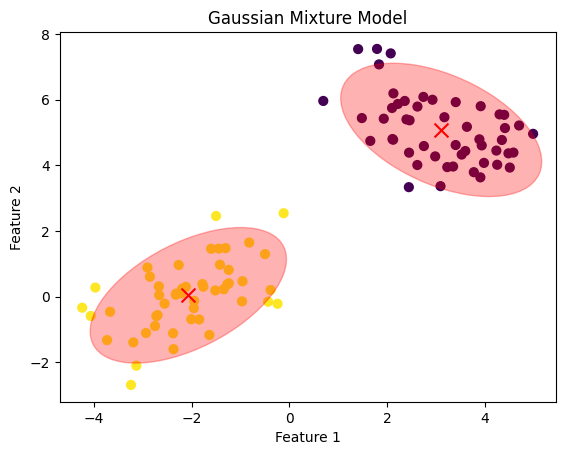

In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generate sample data with 2-dimensional features
np.random.seed(0)
n_samples = 100

# Generate data from two different 2D Gaussian distributions
mean1 = [-2, 0]
cov1 = [[1, 0.5], [0.5, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)

mean2 = [3, 5]
cov2 = [[1, -0.5], [-0.5, 1]]
X2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)

# Combine the datasets
X = np.vstack((X1, X2))

# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)

# Predict the component assignments
labels = gmm.predict(X)

# Plot the data and the GMM components
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', marker='o')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, marker='x')
plt.title('Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the covariances as ellipses
from matplotlib.patches import Ellipse

def plot_cov_ellipse(cov, pos, nstd=2, **kwargs):
    """
    Plots an ellipse representing the covariance matrix cov centered at pos
    """
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(eigvals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    return ellip

ax = plt.gca()

for i in range(2):
    cov = gmm.covariances_[i]
    mean = gmm.means_[i]
    ellip = plot_cov_ellipse(cov, mean, nstd=2, alpha=0.3, color='red')
    ax.add_artist(ellip)

plt.show()


## Example : Applying GMM to an Image

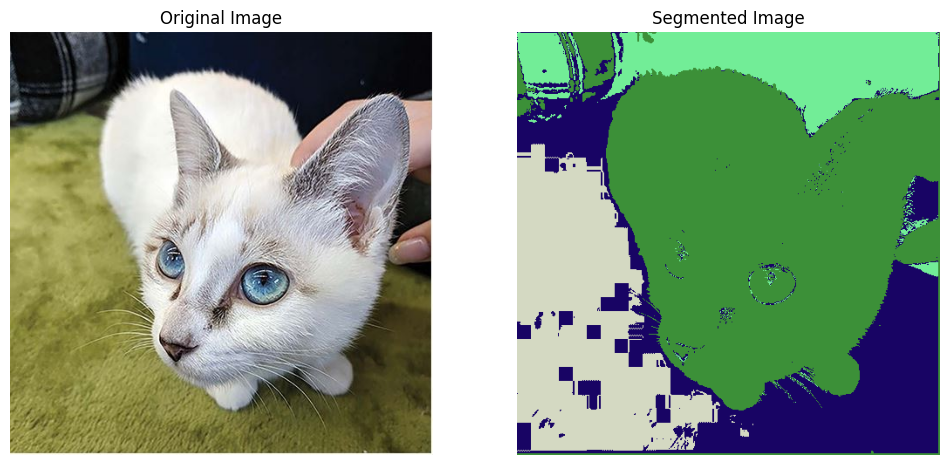

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Step 1: Load the image
image = io.imread('E:/HadiSadoghiYazdi/SadoghiSite/courses/PR/BayesEstimation/BayesEstimationImages/cat.jpg')  # Replace with your image path

# Step 2: Preprocess the image data
# Reshape the image to a 2D array of shape (num_pixels, 3)
pixels = image.reshape(-1, 3)

# Step 3: Fit the GMM
n_components = 4  # Number of segments (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(pixels)

# Predict the cluster labels for each pixel
labels = gmm.predict(pixels)

# Step 4: Reshape the labels to the original image dimensions
segmented_image = labels.reshape(image.shape[:2])

# Step 5: Visualize the segmented image
# Create an RGB image where each cluster is represented by a unique color
colored_segments = np.zeros_like(image)
for i in range(n_components):
    colored_segments[segmented_image == i] = np.random.randint(0, 255, size=3)

# Display the original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(colored_segments)
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()


## HomeWork: After gaining the following experience, explain the routine and the changes required to capture suitable digit generation for each number.

### GMMs for Generating New Data

We just saw a simple example of using a GMM as a generative model in order to create new samples from the distribution defined by the input data. Here we will run with this idea and generate new handwritten digits from the standard digits corpus that we have used before.

To start with, let's load the digits data using Scikit-Learn's data tools:

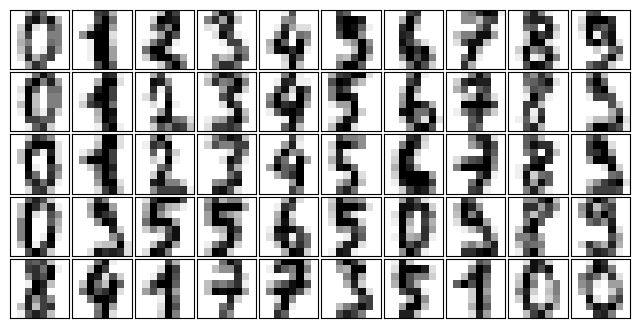

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
def plot_digits(data):
    fig, ax = plt.subplots(5, 10, figsize=(8, 4),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more. GMMs can have difficulty converging in such a high-dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data. Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data:

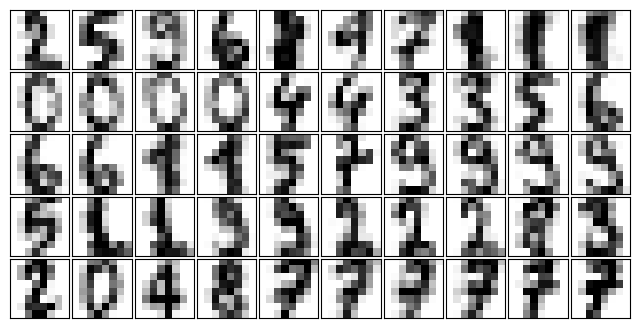

In [18]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
gmm = GaussianMixture(100, covariance_type='full', random_state=0)
gmm.fit(digits.data)
#GMM as a generative model
data_new, label_new = gmm.sample(100)
#digits_new = pca.inverse_transform(data_new)
#plot_digits(digits_new)
plot_digits(data_new)


**HomeWork End**